In [65]:
import pandas as pd

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [66]:
train_data.drop(["id"] , axis=1 , inplace=True)
test_data.drop(["id"] , axis=1 , inplace=True)

In [67]:
#Impute the Feature
median_train_1 = train_data["Time_spent_Alone"].median()
train_data["Time_spent_Alone"] = train_data["Time_spent_Alone"].fillna(median_train_1)
median_test_1 = test_data["Time_spent_Alone"].median()
test_data["Time_spent_Alone"] = test_data["Time_spent_Alone"].fillna(median_test_1)

model_train_1 = train_data["Stage_fear"].mode()[0]
model_test_1 = test_data["Stage_fear"].mode()[0]
train_data["Stage_fear"] = train_data["Stage_fear"].fillna(model_train_1)
test_data["Stage_fear"] = test_data["Stage_fear"].fillna(model_test_1)


In [68]:
median_train_2 = train_data["Social_event_attendance"].median()
train_data["Social_event_attendance"] = train_data["Social_event_attendance"].fillna(median_train_2)
median_test_2 = test_data["Social_event_attendance"].median()
test_data["Social_event_attendance"] = test_data["Social_event_attendance"].fillna(median_test_2)

In [69]:
median_train_3 = train_data["Going_outside"].median()
train_data["Going_outside"] = train_data["Going_outside"].fillna(median_train_3)
median_test_3 = test_data["Going_outside"].median()
test_data["Going_outside"] = test_data["Going_outside"].fillna(median_test_3)

In [70]:
median_train_4 = train_data["Friends_circle_size"].median()
train_data["Friends_circle_size"] = train_data["Friends_circle_size"].fillna(median_train_4)
median_test_4 = test_data["Friends_circle_size"].median()
test_data["Friends_circle_size"] = test_data["Friends_circle_size"].fillna(median_test_4)

In [71]:
median_train_5 = train_data["Post_frequency"].median()
train_data["Post_frequency"] = train_data["Post_frequency"].fillna(median_train_5)
median_test_5 = test_data["Post_frequency"].median()
test_data["Post_frequency"] = test_data["Post_frequency"].fillna(median_test_5)

In [72]:
model_train_6 = train_data["Drained_after_socializing"].mode()[0]
model_test_6 = test_data["Drained_after_socializing"].mode()[0]
train_data["Drained_after_socializing"] = train_data["Drained_after_socializing"].fillna(model_train_6)
test_data["Drained_after_socializing"] = test_data["Drained_after_socializing"].fillna(model_test_6)

In [73]:
#Encoding
from sklearn.preprocessing import LabelEncoder
categ_data = ["Stage_fear" , "Drained_after_socializing"]
for data in categ_data:
    le = LabelEncoder()
    combined = pd.concat([train_data[data] , test_data[data]] , axis=0).astype(str)
    le.fit(combined)
    train_data[data] = le.transform(train_data[data].astype(str))
    test_data[data] = le.transform(test_data[data].astype(str))

In [74]:
#Target Encoding
target_encoder = LabelEncoder()
train_data["Personality"] = target_encoder.fit_transform(train_data["Personality"])

In [75]:
x = train_data.drop(["Personality"] , axis= 1)
y = train_data["Personality"]

In [93]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=4,              # Prevents overfitting
    min_child_weight=3,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    scale_pos_weight=2.85,    # For class imbalance
    random_state=42)

In [94]:
model.fit(x , y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [95]:
from sklearn.metrics import roc_auc_score , confusion_matrix

y_pred = model.predict(x)
y_pred_proba = model.predict_proba(x)
print(confusion_matrix(y , y_pred))
print(roc_auc_score(y , y_pred))

[[13413   286]
 [  288  4537]]
0.959716722259898


In [97]:
test_data_predict = model.predict(test_data)

In [102]:
test_data_predict_encoder = target_encoder.inverse_transform(test_data_predict)
test_data_predict_encoder

array(['Extrovert', 'Introvert', 'Extrovert', ..., 'Extrovert',
       'Extrovert', 'Introvert'], dtype=object)

In [104]:
#Submisson
train = pd.read_csv("test.csv")
submisson = pd.DataFrame({
    "id" : train["id"],
    "Personality" : test_data_predict_encoder
})

submisson.to_csv("submisson.csv" , index=False)

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

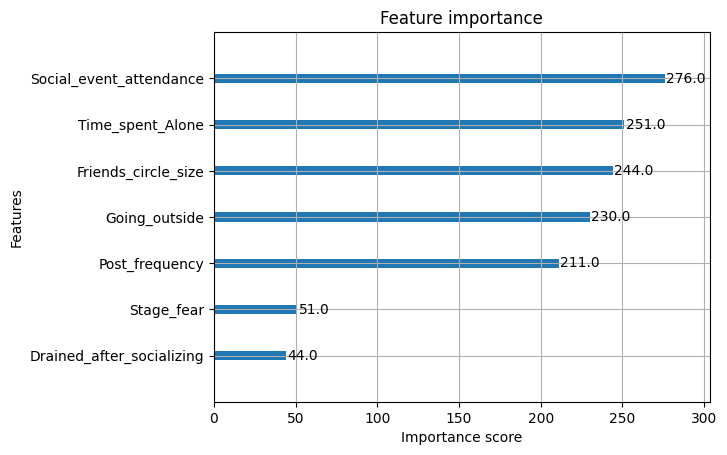

In [107]:
import xgboost as xgb

xgb.plot_importance(model)